In [ ]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/CompleteDataOfWindTurbines (1).xlsx")
df.head()

,Nacelle Position,Wind direction,Ambient Air temp,Bearing Temp,BladePitchAngle,GearBoxSumpTemp,Generator Speed,Hub Speed,Power,Wind Speed,GearTemp,GeneratorTemp,TurbineName,TimeStamp,FaultCode1,FaultCode2,FaultCode3,FaultCode4,FaultCode5,Failure
0,200.242105,29.551066,13.880344,19.975373,207.606465,125.912226,51.818547,3,1053.785148,21.790239,108.991835,140.997911,Turbine_1,2016-01-15 01:00:00,0,1,0,3,2,0
1,67.273576,301.842282,14.117863,21.615885,179.966366,128.048945,47.923266,3,1034.524303,16.899254,290.691299,29.707774,Turbine_1,2016-01-15 02:00:00,4,3,4,2,3,0
2,58.592604,94.307908,40.937419,63.567682,20.538427,30.913525,41.603334,3,1381.744620,5.070242,60.141110,86.054611,Turbine_1,2016-01-15 03:00:00,4,1,3,1,1,0
3,29.985443,72.573989,-29.810445,10.886027,5.106552,47.506512,47.484209,4,71.902984,2.083760,326.173269,77.642602,Turbine_1,2016-01-15 04:00:00,3,2,0,4,4,0
4,130.092380,293.297913,42.407627,17.133548,0.406192,26.158165,65.205590,2,421.717412,14.966026,338.115274,121.392526,Turbine_1,2016-01-15 05:00:00,0,1,4,2,3,0


In [ ]:
df.TurbineName.nunique()

15

In [ ]:
df.groupby("TurbineName").count()

,Nacelle Position,Wind direction,Ambient Air temp,Bearing Temp,BladePitchAngle,GearBoxSumpTemp,Generator Speed,Hub Speed,Power,Wind Speed,GearTemp,GeneratorTemp,TimeStamp,FaultCode1,FaultCode2,FaultCode3,FaultCode4,FaultCode5,Failure
TurbineName,,,,,,,,,,,,,,,,,,,
Turbine_1,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_10,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_11,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_12,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_13,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_14,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_15,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_2,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Turbine_3,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000


In [ ]:
import datetime 
df['Current_Date'] = datetime.datetime.now()
df.head()

,Nacelle Position,Wind direction,Ambient Air temp,Bearing Temp,BladePitchAngle,GearBoxSumpTemp,Generator Speed,Hub Speed,Power,Wind Speed,GearTemp,GeneratorTemp,TurbineName,TimeStamp,FaultCode1,FaultCode2,FaultCode3,FaultCode4,FaultCode5,Failure,Current_Date
0,200.242105,29.551066,13.880344,19.975373,207.606465,125.912226,51.818547,3,1053.785148,21.790239,108.991835,140.997911,Turbine_1,2016-01-15 01:00:00,0,1,0,3,2,0,2021-01-13 04:59:25.066029
1,67.273576,301.842282,14.117863,21.615885,179.966366,128.048945,47.923266,3,1034.524303,16.899254,290.691299,29.707774,Turbine_1,2016-01-15 02:00:00,4,3,4,2,3,0,2021-01-13 04:59:25.066029
2,58.592604,94.307908,40.937419,63.567682,20.538427,30.913525,41.603334,3,1381.744620,5.070242,60.141110,86.054611,Turbine_1,2016-01-15 03:00:00,4,1,3,1,1,0,2021-01-13 04:59:25.066029
3,29.985443,72.573989,-29.810445,10.886027,5.106552,47.506512,47.484209,4,71.902984,2.083760,326.173269,77.642602,Turbine_1,2016-01-15 04:00:00,3,2,0,4,4,0,2021-01-13 04:59:25.066029
4,130.092380,293.297913,42.407627,17.133548,0.406192,26.158165,65.205590,2,421.717412,14.966026,338.115274,121.392526,Turbine_1,2016-01-15 05:00:00,0,1,4,2,3,0,2021-01-13 04:59:25.066029


In [ ]:
df['tot_hour_diff'] = (df.TimeStamp - df.Current_Date) / pd.Timedelta(hours=1)


In [ ]:
df.head()

,Nacelle Position,Wind direction,Ambient Air temp,Bearing Temp,BladePitchAngle,GearBoxSumpTemp,Generator Speed,Hub Speed,Power,Wind Speed,GearTemp,GeneratorTemp,TurbineName,TimeStamp,FaultCode1,FaultCode2,FaultCode3,FaultCode4,FaultCode5,Failure,Current_Date,tot_hour_diff
0,200.242105,29.551066,13.880344,19.975373,207.606465,125.912226,51.818547,3,1053.785148,21.790239,108.991835,140.997911,Turbine_1,2016-01-15 01:00:00,0,1,0,3,2,0,2021-01-13 04:59:25.066029,-43803.990296
1,67.273576,301.842282,14.117863,21.615885,179.966366,128.048945,47.923266,3,1034.524303,16.899254,290.691299,29.707774,Turbine_1,2016-01-15 02:00:00,4,3,4,2,3,0,2021-01-13 04:59:25.066029,-43802.990296
2,58.592604,94.307908,40.937419,63.567682,20.538427,30.913525,41.603334,3,1381.744620,5.070242,60.141110,86.054611,Turbine_1,2016-01-15 03:00:00,4,1,3,1,1,0,2021-01-13 04:59:25.066029,-43801.990296
3,29.985443,72.573989,-29.810445,10.886027,5.106552,47.506512,47.484209,4,71.902984,2.083760,326.173269,77.642602,Turbine_1,2016-01-15 04:00:00,3,2,0,4,4,0,2021-01-13 04:59:25.066029,-43800.990296
4,130.092380,293.297913,42.407627,17.133548,0.406192,26.158165,65.205590,2,421.717412,14.966026,338.115274,121.392526,Turbine_1,2016-01-15 05:00:00,0,1,4,2,3,0,2021-01-13 04:59:25.066029,-43799.990296


In [ ]:
df=df.drop(["TimeStamp","Current_Date"],axis=1)
df.head()

,Nacelle Position,Wind direction,Ambient Air temp,Bearing Temp,BladePitchAngle,GearBoxSumpTemp,Generator Speed,Hub Speed,Power,Wind Speed,GearTemp,GeneratorTemp,TurbineName,FaultCode1,FaultCode2,FaultCode3,FaultCode4,FaultCode5,Failure,tot_hour_diff
0,200.242105,29.551066,13.880344,19.975373,207.606465,125.912226,51.818547,3,1053.785148,21.790239,108.991835,140.997911,Turbine_1,0,1,0,3,2,0,-43803.990296
1,67.273576,301.842282,14.117863,21.615885,179.966366,128.048945,47.923266,3,1034.524303,16.899254,290.691299,29.707774,Turbine_1,4,3,4,2,3,0,-43802.990296
2,58.592604,94.307908,40.937419,63.567682,20.538427,30.913525,41.603334,3,1381.744620,5.070242,60.141110,86.054611,Turbine_1,4,1,3,1,1,0,-43801.990296
3,29.985443,72.573989,-29.810445,10.886027,5.106552,47.506512,47.484209,4,71.902984,2.083760,326.173269,77.642602,Turbine_1,3,2,0,4,4,0,-43800.990296
4,130.092380,293.297913,42.407627,17.133548,0.406192,26.158165,65.205590,2,421.717412,14.966026,338.115274,121.392526,Turbine_1,0,1,4,2,3,0,-43799.990296


In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['TurbineName']= label_encoder.fit_transform(df['TurbineName']) 
 

In [ ]:
df.head()

,Nacelle Position,Wind direction,Ambient Air temp,Bearing Temp,BladePitchAngle,GearBoxSumpTemp,Generator Speed,Hub Speed,Power,Wind Speed,GearTemp,GeneratorTemp,TurbineName,FaultCode1,FaultCode2,FaultCode3,FaultCode4,FaultCode5,Failure,tot_hour_diff
0,200.242105,29.551066,13.880344,19.975373,207.606465,125.912226,51.818547,3,1053.785148,21.790239,108.991835,140.997911,0,0,1,0,3,2,0,-43803.990296
1,67.273576,301.842282,14.117863,21.615885,179.966366,128.048945,47.923266,3,1034.524303,16.899254,290.691299,29.707774,0,4,3,4,2,3,0,-43802.990296
2,58.592604,94.307908,40.937419,63.567682,20.538427,30.913525,41.603334,3,1381.744620,5.070242,60.141110,86.054611,0,4,1,3,1,1,0,-43801.990296
3,29.985443,72.573989,-29.810445,10.886027,5.106552,47.506512,47.484209,4,71.902984,2.083760,326.173269,77.642602,0,3,2,0,4,4,0,-43800.990296
4,130.092380,293.297913,42.407627,17.133548,0.406192,26.158165,65.205590,2,421.717412,14.966026,338.115274,121.392526,0,0,1,4,2,3,0,-43799.990296


In [ ]:
df.groupby("TurbineName").count()

,Nacelle Position,Wind direction,Ambient Air temp,Bearing Temp,BladePitchAngle,GearBoxSumpTemp,Generator Speed,Hub Speed,Power,Wind Speed,GearTemp,GeneratorTemp,FaultCode1,FaultCode2,FaultCode3,FaultCode4,FaultCode5,Failure,tot_hour_diff
TurbineName,,,,,,,,,,,,,,,,,,,
0,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
1,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
2,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
3,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
4,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
5,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
6,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
7,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
8,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000


In [ ]:
df.isnull().sum()

Nacelle Position    0
Wind direction      0
Ambient Air temp    0
Bearing Temp        0
BladePitchAngle     0
GearBoxSumpTemp     0
Generator Speed     0
Hub Speed           0
Power               0
Wind Speed          0
GearTemp            0
GeneratorTemp       0
TurbineName         0
FaultCode1          0
FaultCode2          0
FaultCode3          0
FaultCode4          0
FaultCode5          0
Failure             0
tot_hour_diff       0
dtype: int64

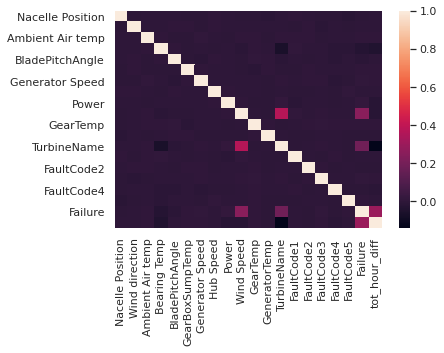

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(df.corr())

In [ ]:
x=df.drop("Failure",axis=1)
y=df["Failure"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[9144,    0],
       [2856,    0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.762